# Modeling and Simulation in Python

Project 1 example

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [86]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [87]:
popstats = [1415045928, 1409517397, 1403500365, 1397028553, 1359755102, 1321623490, 1283198970, 1239940004, 1172445200, 1070863389, 993877310, 920945083, 824788457, 722562183, 657686143, 610834396]
t = [2018, 2017, 2016, 2015, 2010, 2005, 2000, 1995, 1990, 1985, 1980, 1975, 1970, 1965, 1960, 1955]

[2018,
 2017,
 2016,
 2015,
 2010,
 2005,
 2000,
 1995,
 1990,
 1985,
 1980,
 1975,
 1970,
 1965,
 1960,
 1955]

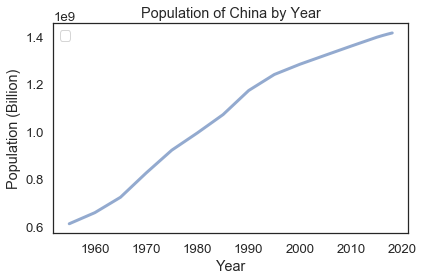

In [88]:
############################################################################
##                Plotting the data from the statistics                   ##
############################################################################

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """

  
    #plot(un, '--', label='UN DESA')
   # if len(timeseries):
    #    plot(timeseries, color='gray', label='model')
    
decorate(xlabel='Year',
         ylabel='Population (Billion)',
         title='Population of China by Year')

plot(t, popstats, label='US Census')

In [89]:
#un = table2.un / 1e9
#census = table2.census / 1e9
#empty = TimeSeries()
#plot_results(census, un, empty, 'World population estimates')

In [90]:
half = 610834396 / 2

305417198.0

In [91]:
init = State(young=half, old=half)

,values
young,305417198.0
old,305417198.0


In [92]:
state = State(pop = 610834396)

system = System(age = 0.5 , onechild = 0.2, exceptions = 0.02, birthrate = 0.01,
                birthrate2 = 0.015, birthrate3 = 0.068, deathrate = 0.005, t0 = 1955, tf = 2016)

,values
age,0.500
onechild,0.200
exceptions,0.020
birthrate,0.010
birthrate2,0.015
birthrate3,0.068
deathrate,0.005
t0,1955.000
tf,2016.000


In [82]:
def update(state, t, system):
    if t >1979 and t < 2016:
        growth1 = system.age * (system.onechild - system.exceptions) * system.birthrate1 * state
        growth2 = system.age *  system.exceptions * system.birthrate2 * state
    else:
        growth3 = system.age * system.birthrate3 * state
    
    NoPolicy = growth3
    YesPolicy = growth1 + growth2
    
    return State(NoPolicy=NoPolicy, YesPolicy=YesPolicy)

In [85]:
state = update(init, system.t0, system)

UnboundLocalError: local variable 'growth1' referenced before assignment

In [75]:
state = update_func1(state, system.t_0, system)

NameError: name 'update_func1' is not defined

In [76]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.young + state.old
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.young + state.old
        
    return results

In [139]:
results = run_simulation(system, update_func1);

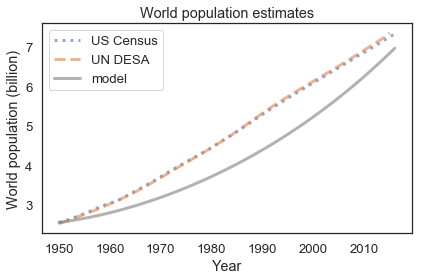

In [140]:
plot_results(census, un, results, 'World population estimates')